In [1]:
import numpy as np

import matplotlib.pyplot as plt

from pm_func_edr3 import *

In [2]:
num = 5

# original = (np.asarray([np.random.uniform(size=num), np.random.uniform(size=num), np.random.uniform(size=num), \
#                        np.random.uniform(size=num), np.random.uniform(size=num), np.random.uniform(size=num)])).T

original = (np.asarray([np.random.uniform(size=num), np.random.uniform(size=num), np.zeros(num), \
                       np.full(num, 0.5), np.full(num, 0.5), np.zeros(num)])).T


x = np.reshape(original[:,0], (len(original),1))
y = np.reshape(original[:,1], (len(original),1))
z = np.reshape(original[:,2], (len(original),1))

vx = np.reshape(original[:,3], (len(original),1))
vy = np.reshape(original[:,4], (len(original),1))
vz = np.reshape(original[:,5], (len(original),1))

In [3]:
theta = np.deg2rad(0.0)
incl = np.deg2rad(45.0)
dist0 =  1.

direction = "2sky"

In [4]:
newxyz = np.zeros((len(original), 3))

newxyz[:,0], newxyz[:,1], newxyz[:,2] = xyz_transform(x, y, z, theta, incl, direction=direction)

new_vxyz = np.zeros((len(original), 3))

new_vxyz[:,0], new_vxyz[:,1], new_vxyz[:,2] = xyz_transform(vx, vy, vz, theta, incl, direction=direction)

Text(0, 0.5, 'Y')

<Figure size 432x288 with 0 Axes>

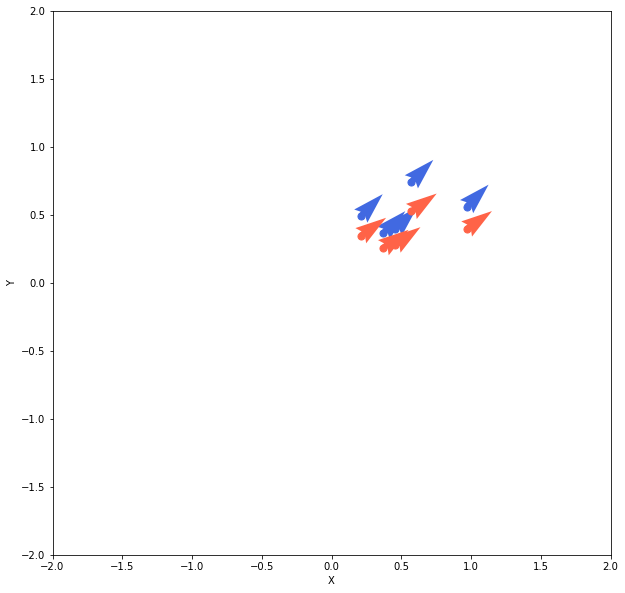

In [5]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(original[:,0], original[:,1], s=50, color="royalblue")
q1 = ax.quiver(original[:,0], original[:,1], original[:,3], original[:,4], lw=2, \
                units="xy", color="royalblue", width=0.05)

ax.scatter(newxyz[:,0], newxyz[:,1], s=50, color="tomato")
q2 = ax.quiver(newxyz[:,0], newxyz[:,1], new_vxyz[:,0], new_vxyz[:,1], lw=2, \
               units="xy", color="tomato", width=0.05)


ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_xlabel('X')
ax.set_ylabel('Y')

In [6]:
direction = "2gal"

x2 = np.reshape(newxyz[:,0], (len(newxyz),1))
y2 = np.reshape(newxyz[:,1], (len(newxyz),1))
z2 = np.reshape(newxyz[:,2], (len(newxyz),1))

position2 = np.zeros((len(x2), 3, 1))
position2[:,0] = x2
position2[:,1] = y2
position2[:,2] = z2

if (direction == "2gal"):
    newposition2 = np.dot(np.linalg.inv(matrix), position2)
    
    
origxyz = np.zeros((len(newxyz), 3))
origxyz[:,0] = np.reshape(newposition2[0], (len(newposition2[0]),))
origxyz[:,1] = np.reshape(newposition2[1], (len(newposition2[1]),))
origxyz[:,2] = np.reshape(newposition2[2], (len(newposition2[2]),))

NameError: name 'matrix' is not defined

In [ ]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(origxyz[:,0], origxyz[:,1], s=50, color="royalblue")
ax.scatter(newxyz[:,0], newxyz[:,1], s=50, color="tomato")
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_xlabel('X')
ax.set_ylabel('Y')